<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Lecture 9 Day 2</div>
<div style="text-align: right">Dino Konstantopoulos, 12 March 2020, with material by Thomas Wiecki</div>


# Poisson model

Let's *warm up* with a simple Poisson model.

In [1]:
%matplotlib inline
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import numpy as np
figsize(12.5, 4)
import matplotlib.pyplot as plt

Suppose this is the number of emails you receive in your inbox every day:

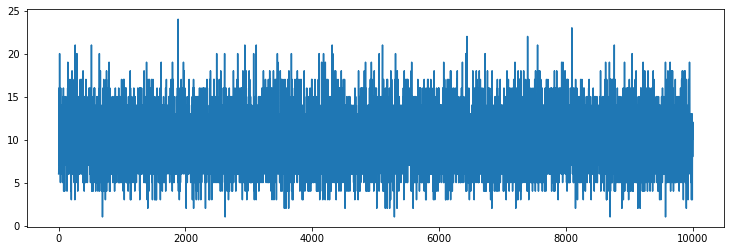

In [2]:
true_rate = 10
n_obs = 10000
poisson_number_of_emails = np.random.poisson(true_rate, n_obs)
plt.plot(poisson_number_of_emails)

(array([6.52173913e-04, 2.73913043e-03, 1.01739130e-02, 2.34782609e-02,
        0.00000000e+00, 4.85217391e-02, 8.83043478e-02, 1.20391304e-01,
        0.00000000e+00, 1.40478261e-01, 1.64739130e-01, 1.59391304e-01,
        0.00000000e+00, 1.51304348e-01, 1.22478261e-01, 9.87391304e-02,
        6.41739130e-02, 0.00000000e+00, 4.70869565e-02, 2.86956522e-02,
        1.76086957e-02, 0.00000000e+00, 8.47826087e-03, 3.13043478e-03,
        2.21739130e-03, 0.00000000e+00, 1.04347826e-03, 2.60869565e-04,
        1.30434783e-04, 1.30434783e-04]),
 array([ 1.        ,  1.76666667,  2.53333333,  3.3       ,  4.06666667,
         4.83333333,  5.6       ,  6.36666667,  7.13333333,  7.9       ,
         8.66666667,  9.43333333, 10.2       , 10.96666667, 11.73333333,
        12.5       , 13.26666667, 14.03333333, 14.8       , 15.56666667,
        16.33333333, 17.1       , 17.86666667, 18.63333333, 19.4       ,
        20.16666667, 20.93333333, 21.7       , 22.46666667, 23.23333333,
        24.     

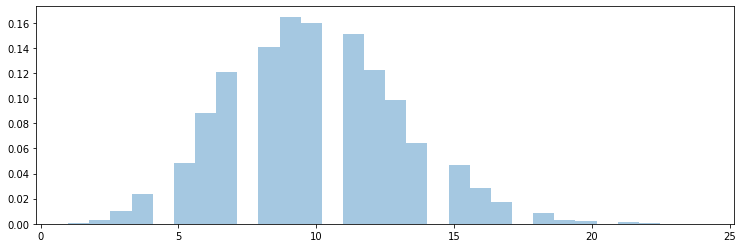

In [3]:
plt.hist(poisson_number_of_emails, 30, density=True, histtype='stepfilled', alpha=0.4)

Now, fit a Poisson Model to get the expectation (how many emails to *expect* every day), and the error. From the histogram above, I could model my `lambda_prior` with a normal distribution with a mean close to 10. But let's assume that I am completely ignorant, and thnk that I'm equally likely to get *any* value from 0 to 20.

Please build a model and run a sim with `PyMC3` here below:

In [8]:
import pymc3 as pm
import theano.tensor as T

# fit a pymc3 model to get the rate
with pm.Model() as email_model:
    lambda_prior = pm.Normal('lambda_prior', 0, 10)

    #likelihood
    Y_obs = pm.Poisson('Y_obs', mu = lambda_prior, observed = poisson_number_of_emails)

In [9]:
with email_model:
    trace = pm.sample(2000, chains = 2, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [lambda_prior]
Sampling 2 chains, 0 divergences: 100%|██████████| 6000/6000 [00:03<00:00, 1557.43draws/s]


D:\Anaconda\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
D:\Anaconda\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BF0048AA08>,
      dtype=object)

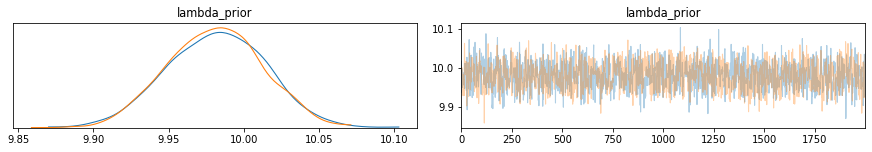

In [10]:
pm.traceplot(trace)

In [11]:
trace["lambda_prior"].mean()

9.980735227437703

So we expect to get 9.99 emails a day. Pretty close!

# Gaussian mixture model

 Varsha requested a Mixture Model in a *simpler* way. The simplest ML library is *always* `scikit-learn`: Just one call to a `.fit()` function. So let's do a Gaussian Mixture Model with `scikit-learn`.
 
>**NOTE**: It may be simple, but can you actually understand *how* the modeling is done? Not really, right? To understand what is going on under the hood, you need to turn to our good old (complex) friend `PyMC3`..

<br />
<center>
<img src="https://media.giphy.com/media/l2Sq8EYhA66vdOfAI/giphy.gif" width=300 />
</center>

In [12]:
%matplotlib inline
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import numpy as np
figsize(12.5, 4)

import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.mixture import GaussianMixture

from matplotlib.colors import LogNorm


# %load std_ipython_import.txt
import pandas as pd
import scipy as spy


import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

We use *three* different 可爱极了 models that we concatenate and then reshape into a 2D array, since that is what `scikit-learn`'s `.fit()` API expects.

>**NOTE**: Use X.reshape(-1, 1) if your data has a single feature/column and X.reshape(1, -1) if it contains a single sample

In [13]:
random_state = np.random.RandomState(seed=1)

In [14]:
np.concatenate([random_state.normal(-1, 1.5, 350),
                    random_state.normal(0, 1, 500),
                    random_state.normal(3, 0.5, 150)]).shape

(1000,)

In [15]:
np.concatenate([random_state.normal(-1, 1.5, 350),
                    random_state.normal(0, 1, 500),
                    random_state.normal(3, 0.5, 150)]).reshape(-1, 1).shape

(1000, 1)

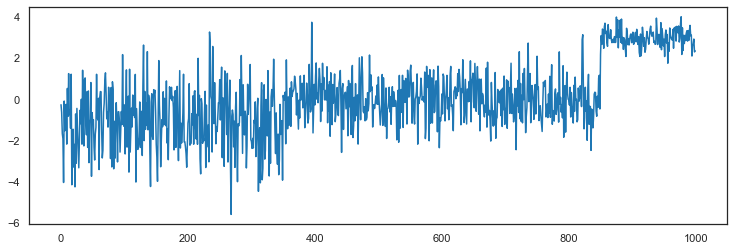

In [16]:
X = np.concatenate([random_state.normal(-1, 1.5, 350),
                    random_state.normal(0, 1, 500),
                    random_state.normal(3, 0.5, 150)]).reshape(-1, 1)
plt.plot(X)

Now that we know what the data looks like, let's peek at its histogram:

(array([0.0031234 , 0.        , 0.        , 0.0031234 , 0.02186382,
        0.01561702, 0.01561702, 0.05622126, 0.04060424, 0.05309786,
        0.11244252, 0.0937021 , 0.10307231, 0.22488505, 0.21551484,
        0.26236589, 0.25299568, 0.28422971, 0.24362547, 0.22800845,
        0.14367656, 0.14055315, 0.06871488, 0.03748084, 0.05622126,
        0.0874553 , 0.15617017, 0.10619572, 0.06871488, 0.02811063]),
 array([-5.59621203, -5.27604846, -4.95588489, -4.63572131, -4.31555774,
        -3.99539416, -3.67523059, -3.35506702, -3.03490344, -2.71473987,
        -2.39457629, -2.07441272, -1.75424914, -1.43408557, -1.113922  ,
        -0.79375842, -0.47359485, -0.15343127,  0.1667323 ,  0.48689587,
         0.80705945,  1.12722302,  1.4473866 ,  1.76755017,  2.08771375,
         2.40787732,  2.72804089,  3.04820447,  3.36836804,  3.68853162,
         4.00869519]),
 <a list of 1 Patch objects>)

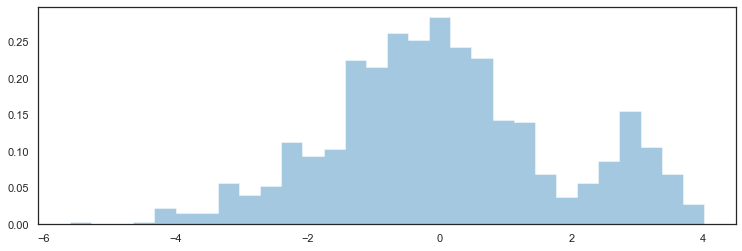

In [17]:
plt.hist(X, 30, density=True, histtype='stepfilled', alpha=0.4)

Hm... I see ***2*** peaks (*I don't know how the data was generated!*), so I will assume 2 gaussians generated my data. So I will build a **Gaussian Mixture** with 2 gaussians. 

`scikit-learn` does this for us automagically: 

In [18]:
mixm = GaussianMixture(n_components=2, random_state=1, verbose=1)
mixm.fit(X)

Initialization 0
Initialization converged: True


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=1, reg_covar=1e-06, tol=0.001, verbose=1,
                verbose_interval=10, warm_start=False, weights_init=None)

Let's plot! 

It turns our that the `score_samples` API that allows us to produce *fake data* from the model yields actually the `log`arithm of the data (remember how the log is the math function that does the best **plastic surgery** to our data so that it looks 可爱极了？Many models do this, so when we generate fake data, we have to take the exponential of the data in order to get realistic-looking data:

(array([0.0031234 , 0.        , 0.        , 0.0031234 , 0.02186382,
        0.01561702, 0.01561702, 0.05622126, 0.04060424, 0.05309786,
        0.11244252, 0.0937021 , 0.10307231, 0.22488505, 0.21551484,
        0.26236589, 0.25299568, 0.28422971, 0.24362547, 0.22800845,
        0.14367656, 0.14055315, 0.06871488, 0.03748084, 0.05622126,
        0.0874553 , 0.15617017, 0.10619572, 0.06871488, 0.02811063]),
 array([-5.59621203, -5.27604846, -4.95588489, -4.63572131, -4.31555774,
        -3.99539416, -3.67523059, -3.35506702, -3.03490344, -2.71473987,
        -2.39457629, -2.07441272, -1.75424914, -1.43408557, -1.113922  ,
        -0.79375842, -0.47359485, -0.15343127,  0.1667323 ,  0.48689587,
         0.80705945,  1.12722302,  1.4473866 ,  1.76755017,  2.08771375,
         2.40787732,  2.72804089,  3.04820447,  3.36836804,  3.68853162,
         4.00869519]),
 <a list of 1 Patch objects>)

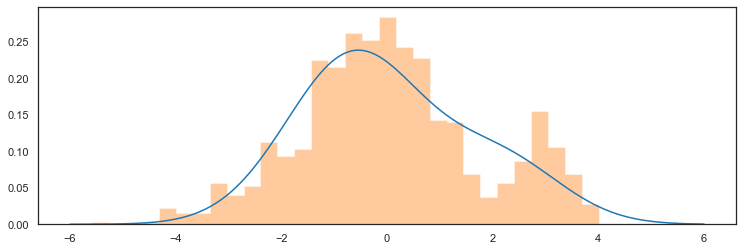

In [19]:
x = np.linspace(-6, 6, 1000)
logprob = mixm.score_samples(x.reshape(-1, 1))
pdf = np.exp(logprob)
plt.plot(x, pdf)
plt.hist(X, 30, density=True, histtype='stepfilled', alpha=0.4)

Hmm... does not look great, does it?

What are the two clusters?

(array([0.0031234 , 0.        , 0.        , 0.0031234 , 0.02186382,
        0.01561702, 0.01561702, 0.05622126, 0.04060424, 0.05309786,
        0.11244252, 0.0937021 , 0.10307231, 0.22488505, 0.21551484,
        0.26236589, 0.25299568, 0.28422971, 0.24362547, 0.22800845,
        0.14367656, 0.14055315, 0.06871488, 0.03748084, 0.05622126,
        0.0874553 , 0.15617017, 0.10619572, 0.06871488, 0.02811063]),
 array([-5.59621203, -5.27604846, -4.95588489, -4.63572131, -4.31555774,
        -3.99539416, -3.67523059, -3.35506702, -3.03490344, -2.71473987,
        -2.39457629, -2.07441272, -1.75424914, -1.43408557, -1.113922  ,
        -0.79375842, -0.47359485, -0.15343127,  0.1667323 ,  0.48689587,
         0.80705945,  1.12722302,  1.4473866 ,  1.76755017,  2.08771375,
         2.40787732,  2.72804089,  3.04820447,  3.36836804,  3.68853162,
         4.00869519]),
 <a list of 1 Patch objects>)

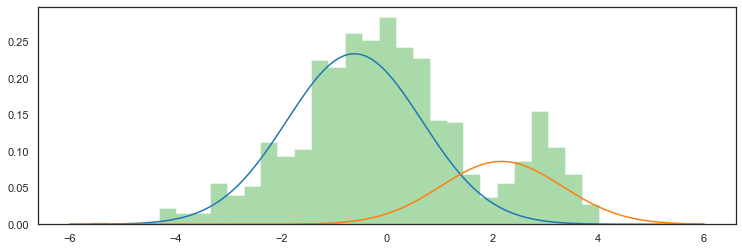

In [20]:
responsibilities = mixm.predict_proba(x.reshape(-1, 1))
pdf_individual = responsibilities * pdf[:, np.newaxis]
plt.plot(x, pdf_individual)
plt.hist(X, 30, density=True, histtype='stepfilled', alpha=0.4)

Hmm... Looking at this, it looks like there has to be an *extra* cluster to the right because the two peaks seem ot be offset from the real peaks! So, as good data scientists, we wiil try another model that contains ***3*** gaussians!

In [21]:
mixm = GaussianMixture(n_components=3, random_state=1, verbose=1)
mixm.fit(X)

Initialization 0
Initialization converged: True


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=1, reg_covar=1e-06, tol=0.001, verbose=1,
                verbose_interval=10, warm_start=False, weights_init=None)

Let's plot!

(array([0.0031234 , 0.        , 0.        , 0.0031234 , 0.02186382,
        0.01561702, 0.01561702, 0.05622126, 0.04060424, 0.05309786,
        0.11244252, 0.0937021 , 0.10307231, 0.22488505, 0.21551484,
        0.26236589, 0.25299568, 0.28422971, 0.24362547, 0.22800845,
        0.14367656, 0.14055315, 0.06871488, 0.03748084, 0.05622126,
        0.0874553 , 0.15617017, 0.10619572, 0.06871488, 0.02811063]),
 array([-5.59621203, -5.27604846, -4.95588489, -4.63572131, -4.31555774,
        -3.99539416, -3.67523059, -3.35506702, -3.03490344, -2.71473987,
        -2.39457629, -2.07441272, -1.75424914, -1.43408557, -1.113922  ,
        -0.79375842, -0.47359485, -0.15343127,  0.1667323 ,  0.48689587,
         0.80705945,  1.12722302,  1.4473866 ,  1.76755017,  2.08771375,
         2.40787732,  2.72804089,  3.04820447,  3.36836804,  3.68853162,
         4.00869519]),
 <a list of 1 Patch objects>)

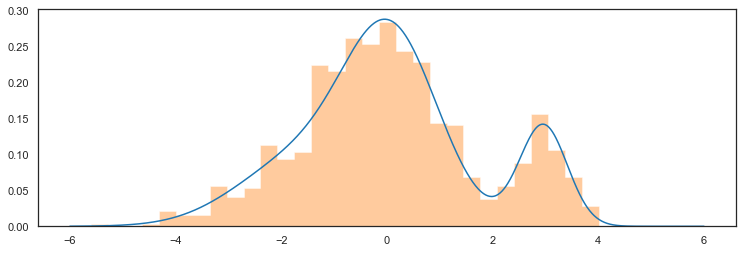

In [22]:
x = np.linspace(-6, 6, 1000)
logprob = mixm.score_samples(x.reshape(-1, 1))
pdf = np.exp(logprob)
plt.plot(x, pdf)
plt.hist(X, 30, density=True, histtype='stepfilled', alpha=0.4)

Ahh.... So much better!

(array([0.0031234 , 0.        , 0.        , 0.0031234 , 0.02186382,
        0.01561702, 0.01561702, 0.05622126, 0.04060424, 0.05309786,
        0.11244252, 0.0937021 , 0.10307231, 0.22488505, 0.21551484,
        0.26236589, 0.25299568, 0.28422971, 0.24362547, 0.22800845,
        0.14367656, 0.14055315, 0.06871488, 0.03748084, 0.05622126,
        0.0874553 , 0.15617017, 0.10619572, 0.06871488, 0.02811063]),
 array([-5.59621203, -5.27604846, -4.95588489, -4.63572131, -4.31555774,
        -3.99539416, -3.67523059, -3.35506702, -3.03490344, -2.71473987,
        -2.39457629, -2.07441272, -1.75424914, -1.43408557, -1.113922  ,
        -0.79375842, -0.47359485, -0.15343127,  0.1667323 ,  0.48689587,
         0.80705945,  1.12722302,  1.4473866 ,  1.76755017,  2.08771375,
         2.40787732,  2.72804089,  3.04820447,  3.36836804,  3.68853162,
         4.00869519]),
 <a list of 1 Patch objects>)

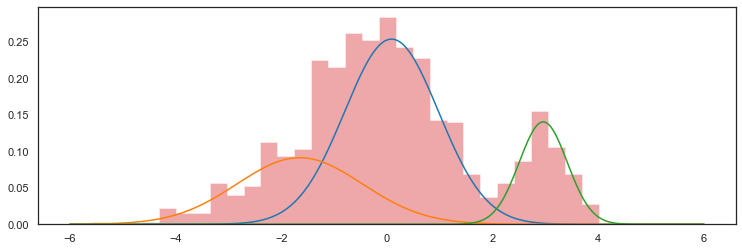

In [23]:
responsibilities = mixm.predict_proba(x.reshape(-1, 1))
pdf_individual = responsibilities * pdf[:, np.newaxis]
plt.plot(x, pdf_individual)
plt.hist(X, 30, density=True, histtype='stepfilled', alpha=0.4)

Yes! That's it! What a beautiful model!

But... what if I have ***no idea*** about the number of components? What if there are... 10!?

Well, let's try them all!

In [24]:
# fit models with 1-10 components
N = np.arange(1, 11)
models = [None for i in range(len(N))]

for i in range(len(N)):
    models[i] = GaussianMixture(N[i]).fit(X)

Now let's compute some information criteria to help us pick the best possible model.

The two most popular information criteria for statistical models are [Akaike's Information criterion](https://en.wikipedia.org/wiki/Akaike_information_criterion) (**AIC**), discovered by the statistician [Hirotugu Akaike](https://en.wikipedia.org/wiki/Hirotugu_Akaike), and the [Bayesian information criterion](https://en.wikipedia.org/wiki/Bayesian_information_criterion) (**BIC**), discovered by Gideon E. Schwarz, both of which are included in `scikit-learn`!

When a statistical model is used to represent a process that generated the data, some information will be lost by using the model to represent the data. AIC estimates the relative amount of information lost by a given model: the less information a model loses, the higher the quality of that model.

Gideon uses some linear algebra in his reasoning, so I won't give you more details. Linear Algebra is next on our topics to discover! If you want to know more about it, it's [here](https://www.andrew.cmu.edu/user/kk3n/simplicity/schwarzbic.pdf).

In [25]:
# compute the AIC and the BIC
AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

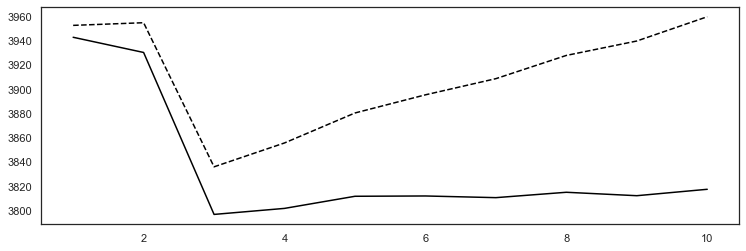

In [26]:
plt.plot(N, AIC, '-k', label='AIC')
plt.plot(N, BIC, '--k', label='BIC')

We see immediately that the best possible model is for ***3*** gaussian clusters.

What are the areas of responsibility of each cluster, as we did in our PyMC3 notebook (if a point is in a specific range, which cluster does it most probably belong to)?

Text(0, 0.5, '$p({\\rm class}|x)$')

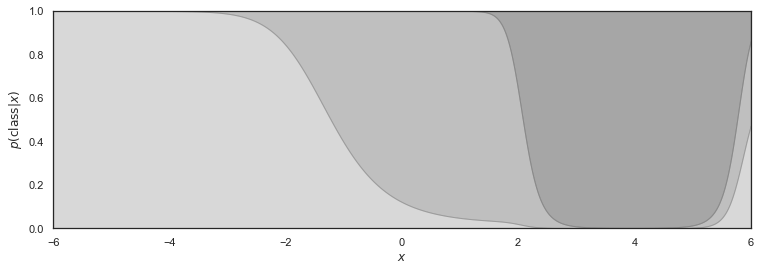

In [27]:
p = responsibilities
p = p[:, (1, 0, 2)]  # rearrange order so the plot looks better
p = p.cumsum(1).T

plt.fill_between(x, 0, p[0], color='gray', alpha=0.3)
plt.fill_between(x, p[0], p[1], color='gray', alpha=0.5)
plt.fill_between(x, p[1], 1, color='gray', alpha=0.7)
plt.xlim(-6, 6)
plt.ylim(0, 1)
plt.xlabel('$x$')
plt.ylabel(r'$p({\rm class}|x)$')

And that, dear class, is the process of data science! 

>**Data Science**: Go back in time to find the process that generated the data. Just like the source of a river, it's where it's the smallest and easiest to "*remember*". That is also where you'll find all of its gold!

<br />
<center>
<img src="https://media3.giphy.com/media/JyskkePkMKt7a/source.gif" width=400 />
</center>

## Chinese restaurant process

In probability theory, the [Chinese restaurant process](https://en.wikipedia.org/wiki/Chinese_restaurant_process) is a discrete-time stochastic process, analogous to seating customers at tables in a Chinese restaurant. 

Imagine a Chinese restaurant with an infinite number of circular tables, each with infinite capacity. 

Customer 1 sits at the first table. The next customer either sits at the same table as customer 1, or the next table. 

This continues, with each customer choosing to either sit at an occupied table with a probability proportional to the number of customers already there, or an unoccupied table. 

> Chinese people are more likely to sit at a table with many customers than a few! Is that true? I do not know for sure, but it makes sense! Western people are *selfish*: They want tables *for themselves*. 中国人 are less selfish and they like to *share* tables.

At time n, the n customers have been partitioned among m ≤ n tables (or blocks of the partition). The results of this process are exchangeable, meaning the order in which the customers sit does not affect the probability of the final distribution. This property greatly simplifies a number of problems in population genetics, linguistic analysis, and image recognition.

## Dirichlet processes

Dirichlet processes are used when modelling data that tends to repeat previous values. There are several equivalent views of the Dirichlet process. The Dirichlet process can be defined implicitly through the Chinese restaurant process. 

Because customers sit at a table with a probability proportional to the number of customers already sitting at the table, the Dirichlet process exhibits a **self-reinforcing** property: The more often a given value has been sampled in the past, the more likely it is to be sampled again.

Let's demonstrate a Dirichlet process:

In [28]:
K = 3
np.array([1.]*K)

array([1., 1., 1.])

A Dirichlet process yields probabilities, so in \[0, 1\]:

In [29]:
with pm.Model() as model:
    # numbers from the set {0, 1, 2}, where the values are sampled from a Dirichlet distribution with a=np.array([1.]*K)
    category = pm.Dirichlet('category', a=np.array([1.]*K))
    trace = pm.sample(100, step=pm.Metropolis())
    #trace = pm.sample(100, step=pm.BinaryMetropolis())
    
print(trace['category'])

Only 100 samples in chain.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [category]
Sampling 4 chains, 0 divergences: 100%|██████████| 2400/2400 [00:02<00:00, 1141.28draws/s]
The rhat statistic is larger than 1.2 for some parameters.
The number of effective samples is smaller than 10% for some parameters.


[[0.01416776 0.22332467 0.76250757]
 [0.20367127 0.35720907 0.43911966]
 [0.59492825 0.11535924 0.28971251]
 ...
 [0.21402497 0.60180763 0.1841674 ]
 [0.21402497 0.60180763 0.1841674 ]
 [0.21533894 0.51694882 0.26771225]]


In [30]:
import pandas as pd
pd.DataFrame(trace['category'])

,0,1,2
0,0.014168,0.223325,0.762508
1,0.203671,0.357209,0.439120
2,0.594928,0.115359,0.289713
3,0.638128,0.152233,0.209639
4,0.638128,0.152233,0.209639
...,...,...,...
395,0.456218,0.392977,0.150805
396,0.214025,0.601808,0.184167
397,0.214025,0.601808,0.184167
398,0.214025,0.601808,0.184167


Do you see the repretitions?

Now let's use a Dirichlet process to generate Categorical variables exhibiting chinese restaurant concentrations. Since the Dirichlet process is seeded with a 3D array of concentrations, we have 3 categories: {1, 2, 3}.

In [31]:
K = 3
with pm.Model() as model:
    # numbers from the set {0, 1, 2}, where the values are sampled from a Dirichlet distribution with a=np.array([1.]*K)
    category = pm.Categorical(name='category', p=pm.Dirichlet('p', a=np.array([1.]*K)))
    trace = pm.sample(100, step=pm.Metropolis())
    #trace = pm.sample(100, step=pm.BinaryMetropolis())
    
print(trace['category'])

Only 100 samples in chain.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [category]
>Metropolis: [p]
Sampling 4 chains, 0 divergences: 100%|██████████| 2400/2400 [00:02<00:00, 1033.55draws/s]
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The number of effective samples is smaller than 10% for some parameters.


[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 1 1 1 0 0 0 0 1 0 0 0 0
 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2 2 2 1 2 1 1 0 1 1 2 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 1 1 1 1 1 0 0 1 1 2 1 1 0 1 2 0 0 0 2
 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 1 1 1 2 1 1 0 0 2 2 2
 2 0 0 0 1 1 1 0 0 0 0 2 2 2 2 0 0 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 2
 2 1 1 1 1 1 1 1 1 1 0 0 0 0 2 2 2 2 2 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0
 0 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1
 1 1 1 1 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 0 0 2 2]


Note the concentrations:

In [32]:
','.join([str(x) for x in trace['category']])

'0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,2,1,1,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,2,2,2,2,1,2,1,1,0,1,1,2,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,1,1,1,1,1,1,0,0,1,1,2,1,1,0,1,2,0,0,0,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,1,1,1,2,1,1,0,0,2,2,2,2,0,0,0,1,1,1,0,0,0,0,2,2,2,2,0,0,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,1,1,1,1,2,2,1,1,1,1,1,1,1,1,1,0,0,0,0,2,2,2,2,2,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,1,2,2,2,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,2,2,2,2,0,0,2,2'

Pretty balanced, tough!

In [33]:
from collections import Counter
Counter(trace['category'])

Counter({0: 117, 1: 184, 2: 99})

For kicks, from 0 to 9:

In [34]:
K = 10
with pm.Model() as model:
    # numbers from the set {0, 1, 2}, where the values are sampled from a Dirichlet distribution with a=np.array([1.]*K)
    category = pm.Categorical(name='category', p=pm.Dirichlet('p', a=np.array([1.]*K)))
    trace = pm.sample(100, step=pm.Metropolis(), chains=1)
    #trace = pm.sample(100, step=pm.BinaryMetropolis())
    
','.join([str(x) for x in trace['category']])

Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [category]
>Metropolis: [p]
Sampling chain 0, 0 divergences: 100%|██████████| 600/600 [00:00<00:00, 2164.04it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


'8,8,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,6,5,5,4,4,3,3,4,3,1,1,1,1,1,1,2,2,2,1,1,1,1,3,4,4,5,5,5,4,4,7,7,8,8,8,8,8,9,9,6,6,6,6,6,7,8,8,8,8,8,7,7,7,7,7,7,7,7,6,6,6,5,6,6,6,6,7,6,7,7,7,6,6,6'

Compare with a Bernoulli distribution:

In [35]:
with pm.Model() as model:
    # numbers from the set {0, 1, 2}, where the values are sampled from a Dirichlet distribution with a=np.array([1.]*K)
    category = pm.Categorical(name='category', p=np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]))
    trace = pm.sample(100, step=pm.Metropolis(), chains=1)
    #trace = pm.sample(100, step=pm.BinaryMetropolis())
    
','.join([str(x) for x in trace['category']])

Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
Metropolis: [category]
Sampling chain 0, 0 divergences: 100%|██████████| 600/600 [00:00<00:00, 8947.12it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


'3,5,8,1,6,7,9,4,6,4,5,5,5,5,4,6,1,0,0,4,8,6,6,5,4,4,9,9,4,6,6,6,7,7,7,9,9,7,9,9,9,6,5,5,4,5,3,3,3,3,5,6,9,9,9,6,6,7,6,6,6,5,8,8,7,7,0,0,0,0,0,5,2,2,0,0,3,3,5,2,2,2,4,2,2,4,4,9,3,1,2,2,2,2,3,4,4,0,0,0'

What't the moral of this story? Dirichlet distributions are actually often closer to what we observe in nature, where there is more repetition, and they also are a *much better* starting (prior belief) distribution for Bayesian estimation!

So let's use them!

# Gaussian Mixture Model with PyMC3

Now let's try a Gaussian mixture model with `PyMC3`!

We simulate some data sourced from three *very simple* 可爱极了 gaussian clusters:

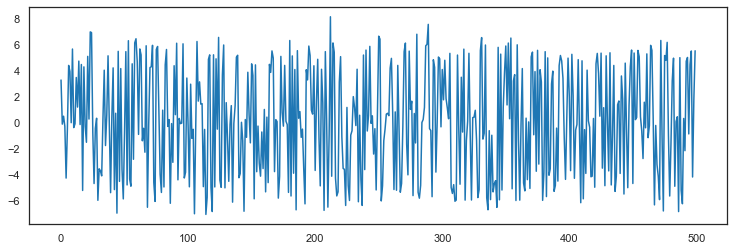

In [36]:
import pymc3 as pm, theano.tensor as tt

# simulate data from a known mixture distribution
np.random.seed(12345) # set random seed for reproducibility

k = 3
ndata = 500
spread = 5
centers = np.array([-spread, 0, spread])

# simulate data from mixture distribution
v = np.random.randint(0, k, ndata)
data = centers[v] + np.random.randn(ndata)

plt.plot(data)

(array([ 50.,  77.,  31.,  25., 106.,  48.,  13.,  71.,  73.,   6.]),
 array([-7.04042311, -5.5210433 , -4.00166348, -2.48228367, -0.96290385,
         0.55647596,  2.07585577,  3.59523559,  5.1146154 ,  6.63399522,
         8.15337503]),
 <a list of 10 Patch objects>)

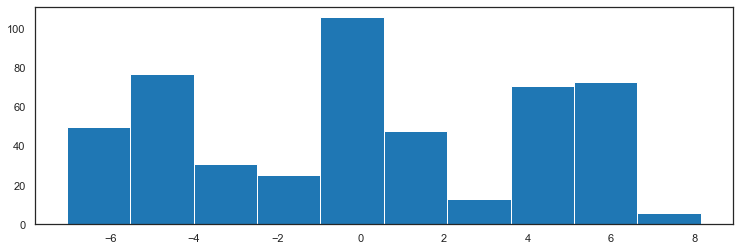

In [37]:
plt.hist(data)

So my data looks **trimodal**!

Let's build a model! In the model below, I've commented out some code that *you* will comment back in and run the sim again, ***at home*** (not now). It fixes a little problem. 

But in any case, notice how we *start* with a Dirichlet distribution. It actually makes more sense that neighboring point belong to the same cluster, rather than that points are randonly assigned to clusters.

In [38]:
import pymc3 as pm, theano.tensor as tt

with pm.Model() as trimodel:
    # cluster sizes
    p = pm.Dirichlet('p', a=np.array([1., 1., 1.]), shape=k)
    
    # ensure all clusters have some points
    #p_min_potential = pm.Potential('p_min_potential', tt.switch(tt.min(p) < .1, -np.inf, 0))

    # cluster centers
    means = pm.Normal('means', mu=[0, 0, 0], sigma=15, shape=k)
    
    # break symmetry
    #order_means_potential = pm.Potential('order_means_potential',
    #                                     tt.switch(means[1]-means[0] < 0, -np.inf, 0)
    #                                     + tt.switch(means[2]-means[1] < 0, -np.inf, 0))

    # measurement error
    sd = pm.Uniform('sd', lower=0, upper=20)

    # latent cluster of each observation
    category = pm.Categorical('category', p = p, shape = ndata)

    # likelihood for each observed value
    points = pm.Normal('obs', mu = means[category], sigma = sd, observed = data)

Before you run this sim, open your laptop's Performance monitor (`Task Manager | Performance` on Windows), and see how fast your CPU will run. You will be *racing it* like a F1 car! When was the last time you did that on your laptop?

>**Benchmark**: 5 minutes  on my laptop.

In [39]:
with trimodel:
    step1 = pm.Metropolis(vars = [p, sd, means])
    step2 = pm.ElemwiseCategorical(vars = [category], values = [0, 1, 2])
    tr = pm.sample(10000, step=[step1, step2], tune=5000)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: ElemwiseCategorical is deprecated, switch to CategoricalGibbsMetropolis.
  This is separate from the ipykernel package so we can avoid doing imports until
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>CompoundStep
>>Metropolis: [means]
>>Metropolis: [sd]
>>Metropolis: [p]
>ElemwiseCategorical: [category]
Sampling 4 chains, 0 divergences: 100%|██████████| 60000/60000 [02:45<00:00, 363.50draws/s]
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Plot results:

D:\Anaconda\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
D:\Anaconda\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
D:\Anaconda\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
D:\Anaconda\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
D:\A

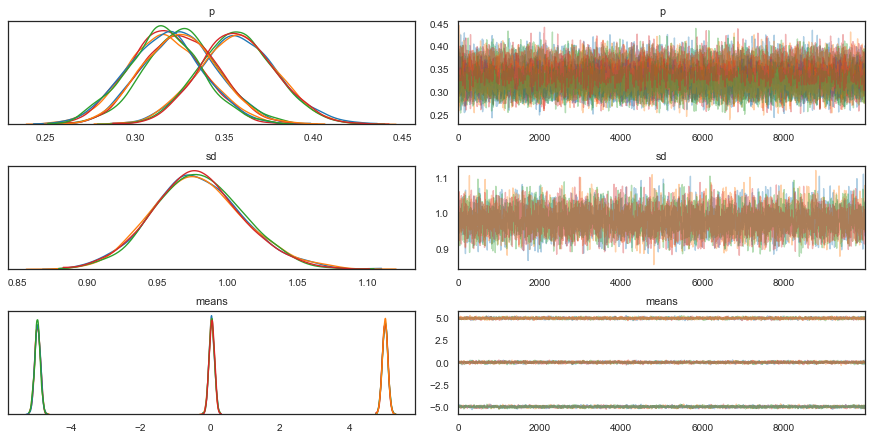

In [40]:
pm.traceplot(tr, var_names=['p', 'sd', 'means']);

D:\Anaconda\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
D:\Anaconda\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
D:\Anaconda\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
D:\Anaconda\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
D:\A

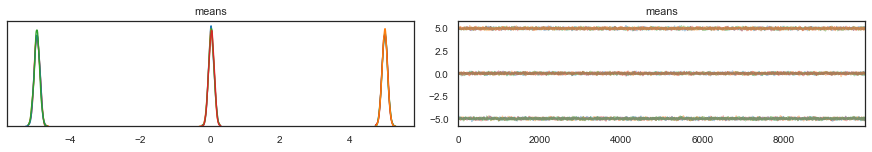

In [41]:
pm.traceplot(tr, var_names=['means']);

After thinning:

D:\Anaconda\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
D:\Anaconda\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
D:\Anaconda\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
D:\Anaconda\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
D:\A

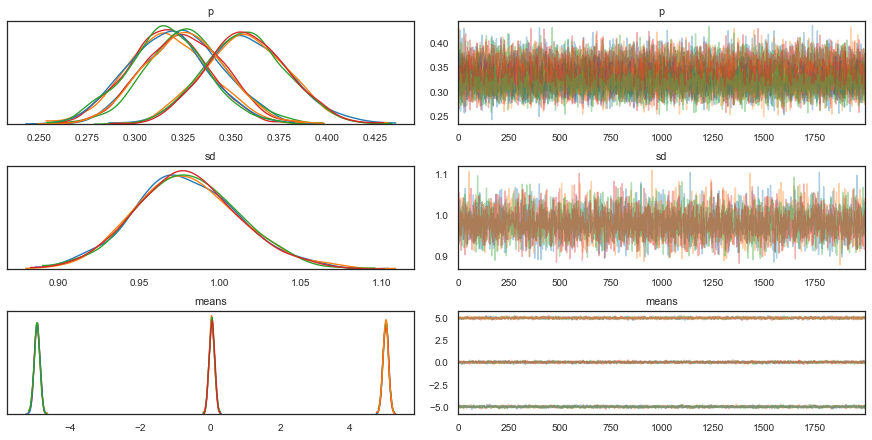

In [42]:
pm.plots.traceplot(tr[::5], var_names=['p', 'sd', 'means']);

Did we converge?

>**Note**: Convergence does not mean that your model is the ***best***. It means that your model ***worked***, but there could be a better one.. You need more sims to figure out the best model, leveraging some kind of information criteria like AIC or BIC.

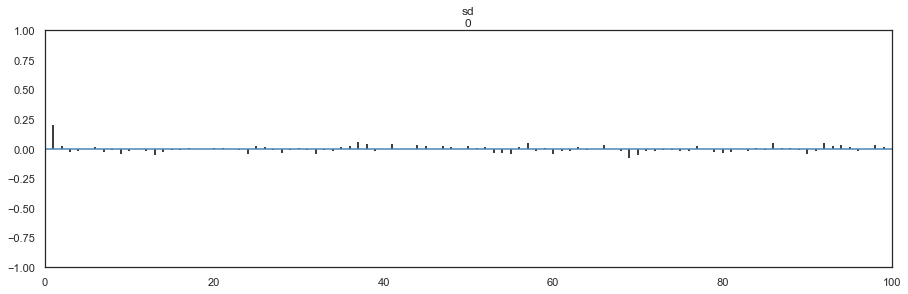

In [43]:
# autocorrelation plots for serious confirmation of MCMC convergence
pm.autocorrplot(tr[::5], var_names=['sd']);

In [44]:
tr["p"].shape

(40000, 3)

In [45]:
p1 = tr["p"][:,0]
p2 = tr["p"][:,1]
p3 = tr["p"][:,2]

In [46]:
tr["means"].shape

(40000, 3)

There's an *interesting* mysterious phenomenon happening: Every 5,000 timesteps, the model switches the 3 clusters :-)

In [ ]:
plt.plot(tr["means"][:,0])

In [ ]:
plt.plot(tr["means"][:,1])

In [ ]:
plt.plot(tr["means"][:,2])

In [ ]:
plt.plot(tr["means"][:,0])
plt.plot(tr["means"][:,1])
plt.plot(tr["means"][:,2])

Sooo funny! The sim *warned me of non-convergence*. It's not that it's not converging, it's that it's oscillating clusters unpredictably. Other people have noticed that, [too](https://discourse.pymc.io/t/mixture-models-and-breaking-class-symmetry/208).  What I need to do is enforce a constraint so that means[0] < means[1] < means[2] or something similar. So I'm going to consider the last 10,000 timesteps, where there is no oscillation :-)

>**NOTE**: The PyMC3 authors fixed this problem with the calls in my model that I have commented out above. For homework, rerun the sim with the commented out code commented back in, and see the difference: No more oscillations between mean assignments!

In [ ]:
plt.plot(tr["means"][30000:,0])

In [ ]:
center_trace_1 = tr["means"][:,0]
center_trace_2 = tr["means"][:,1]
center_trace_3 = tr["means"][:,2]

In [ ]:
std_trace = tr["sd"][:]

In [ ]:
center_trace_1 = tr["means"][30000:,0]
center_trace_2 = tr["means"][30000:,1]
center_trace_3 = tr["means"][30000:,2]

In [ ]:
std_trace = tr["sd"][30000:]

In [ ]:
center_trace.shape

In [ ]:
# pretty colors
colors = ["#348ABD", "#A60628", "#760628"]

In [ ]:
import scipy.stats as stats
norm = stats.norm
figsize(15, 5)
x = np.linspace(-8, 8, 500)

posterior_center_means_1 = center_trace_1.mean(axis=0)
posterior_center_means_2 = center_trace_2.mean(axis=0)
posterior_center_means_3 = center_trace_3.mean(axis=0)
posterior_std_means = std_trace.mean(axis=0)
posterior_p1_mean = p1.mean()
posterior_p2_mean = p2.mean()
posterior_p3_mean = p3.mean()

plt.hist(data, bins=30, histtype="step", normed=True, color="k", lw=2, label="data histogram")

y = posterior_p1_mean * norm.pdf(x, loc=posterior_center_means_1, scale=posterior_std_means)
plt.plot(x, y, label="Cluster 0 (using posterior-mean parameters)", lw=3)
plt.fill_between(x, y, color=colors[2], alpha=0.3)

y = posterior_p2_mean * norm.pdf(x, loc=posterior_center_means_2, scale=posterior_std_means)
plt.plot(x, y, label="Cluster 1 (using posterior-mean parameters)", lw=3)
plt.fill_between(x, y, color=colors[1], alpha=0.3)

y = posterior_p3_mean * norm.pdf(x, loc=posterior_center_means_3, scale=posterior_std_means)
plt.plot(x, y, label="Cluster 2 (using posterior-mean parameters)", lw=3)
plt.fill_between(x, y, color=colors[0], alpha=0.3)

plt.legend(loc="upper left")
plt.title("Visualizing Clusters using posterior-mean parameters");

### Cluster prediction

What cluster does the datapoint `4` most likely belong to?

In [ ]:
def cluster_posterior(i=0):
    print('true cluster:', v[i])
    print('  data value:', np.round(data[i],2))
    plt.hist(tr['category'][::5, i], bins=[-.5, .5, 1.5, 2.5,], rwidth=.9)
    plt.axis(xmin=-.5, xmax=2.5)
    plt.xticks([0,1,2])
    
cluster_posterior(4)

In [ ]:
from IPython.core.display import HTML


def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()
